# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load Image

In [2]:
image_path = "/kaggle/input/lama-nshof/baby-image.jpg"
image = cv2.imread(image_path)

print(image.shape)
print(image.dtype)

(677, 787, 3)
uint8


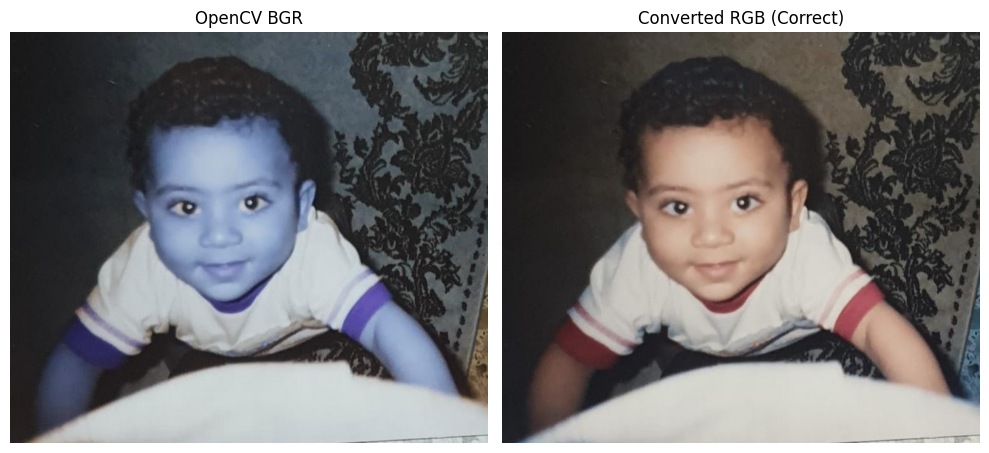

In [3]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
    
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('OpenCV BGR')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_rgb)
plt.title('Converted RGB (Correct)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Greyscale Coversion

(677, 787)


(-0.5, 786.5, 676.5, -0.5)

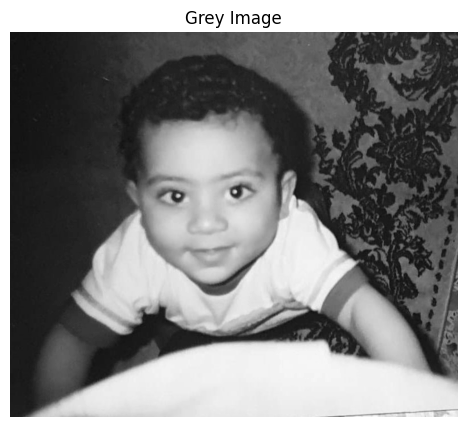

In [4]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image_gray.shape)

plt.figure(figsize=(10, 5))
plt.imshow(image_gray, cmap='gray')
plt.title('Grey Image')
plt.axis('off')

# Noise Filtering

(-0.5, 786.5, 676.5, -0.5)

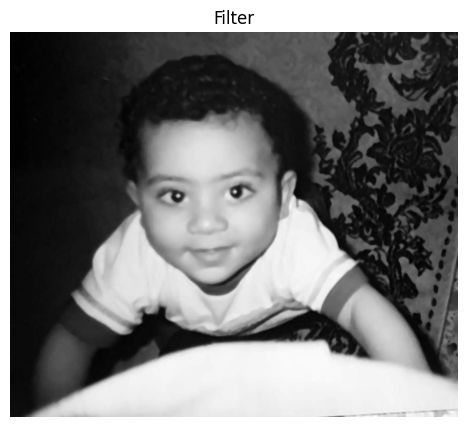

In [5]:
kernel_size = 5

filtered = cv2.medianBlur(image_gray, kernel_size)

plt.figure(figsize=(10, 5))
plt.imshow(filtered, cmap='gray')
plt.title('Filter')
plt.axis('off')

# Edge Detection

(-0.5, 786.5, 676.5, -0.5)

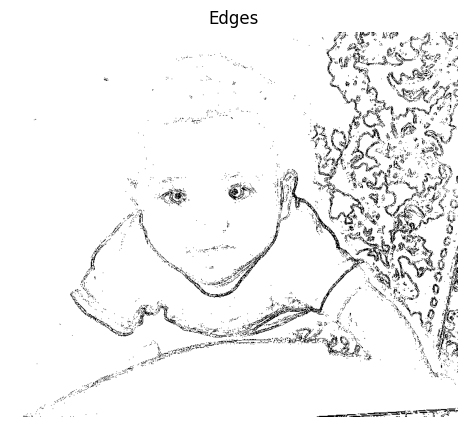

In [6]:
laplacian = cv2.Laplacian(filtered, cv2.CV_64F)
laplacian_abs = np.absolute(laplacian)

p98 = np.percentile(laplacian_abs, 98)  # Ignore top 2% of values, image had too many edges
laplacian_scaled = np.uint8(255 * np.minimum(laplacian_abs / p98, 1.0))

_, sketch = cv2.threshold(laplacian_scaled, 150, 255, cv2.THRESH_BINARY_INV) # Invert

plt.figure(figsize=(10, 5))
plt.imshow(sketch, cmap='gray')
plt.title('Edges')
plt.axis('off')

# Color Painting

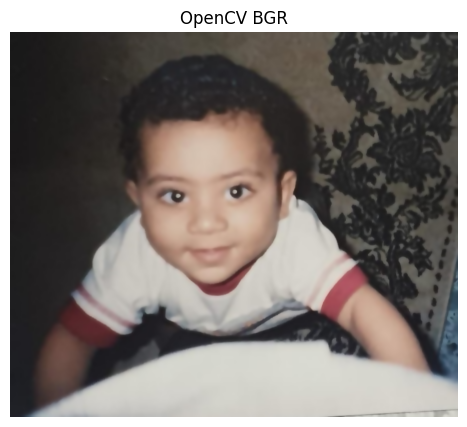

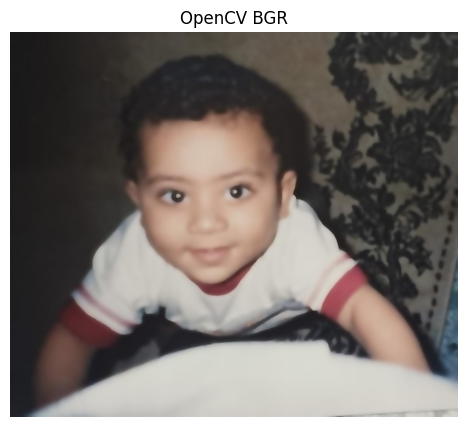

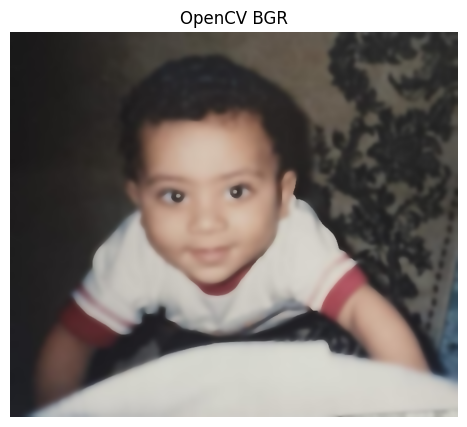

In [7]:
for num_filters in [1, 2, 4]: # More than 4 was too much
    test_cartoon = image.copy()
    
    for i in range(num_filters):
        test_cartoon = cv2.bilateralFilter(test_cartoon, 9, 100, 100) # How blurry should I make it?

    cartoon_image_rgb = cv2.cvtColor(test_cartoon, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.imshow(cartoon_image_rgb)
    plt.title('OpenCV BGR')
    plt.axis('off')

# Cartoonify Image

(-0.5, 786.5, 676.5, -0.5)

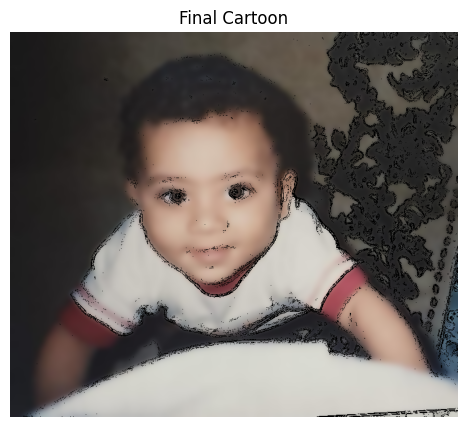

In [8]:
sketch_bgr = cv2.cvtColor(sketch, cv2.COLOR_GRAY2BGR)
final_cartoon = cv2.bitwise_and(test_cartoon, sketch_bgr)
final_cartoon_rgb = cv2.cvtColor(final_cartoon, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(final_cartoon_rgb)
plt.title('Final Cartoon')
plt.axis('off')